In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import libraries

In [3]:
# define path
path='/Users/z/Documents/CF/Unit 1/4. Python Fundamentals for Data Analysts /06-2023-Instacart Basket Analysis'

In [4]:
# import pkl
df =  pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','Eercise_4.9_part1_ords-prods-cust.pkl'))

In [11]:
# assure correct DF is imported
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,First Name,Surnam,Gender,STATE,Age,date_joined,children,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,NaN,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,high spender,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,high spender,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,high spender,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,high spender,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Visualisations

<Axes: ylabel='Frequency'>

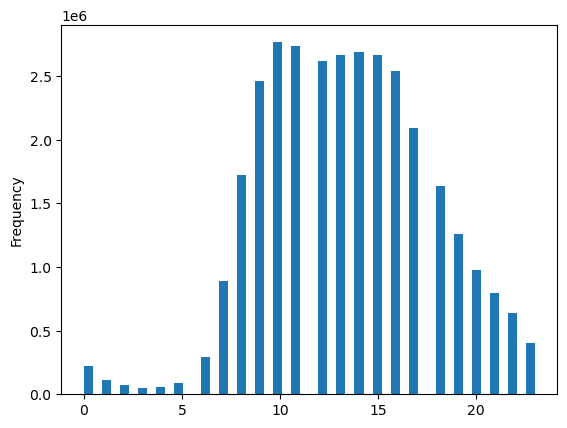

In [5]:
# Histogram (question 3)
df['order_hour_of_day'].plot.hist(bins = 50)


In [ ]:
# there is a clear pick from the late morning until early evening with the exclusion of noon time, probably due to lunch time. 

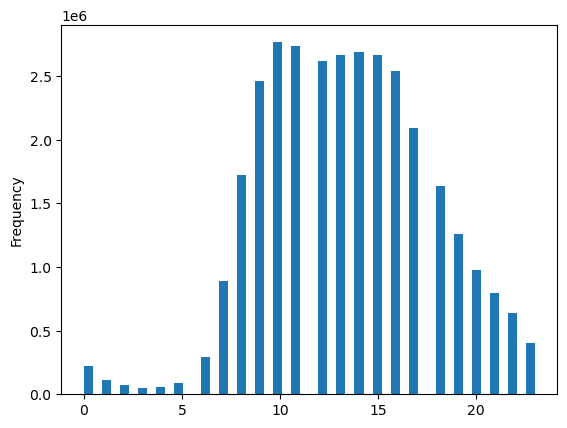

In [36]:
# save histogram
hist=df['order_hour_of_day'].plot.hist(bins = 50)

In [37]:
# export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'q3_orders_hour_freq.png'))


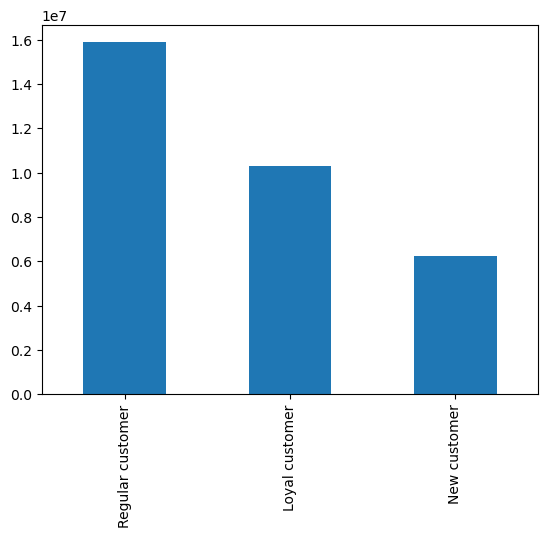

In [38]:
# Bar chart (question 4)
bar=df['loyalty_flag'].value_counts().plot.bar()


In [39]:
# export bar
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'q4_loyalty_customer_distribution.png'))


In [ ]:
# Line chart (question 5)

In [6]:
# sample data
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7


In [7]:
dev

array([False,  True, False, ..., False,  True,  True])

In [8]:
# split data to cohorts 70/30
big = df[dev]
small = df[~dev]


In [9]:
# check output
len(big)+len(small)

32434212

In [10]:
len(df)

32434212

In [11]:
# create new df to address only columns needed
df_q5=small[['order_hour_of_day','prices']]

In [12]:
# check output
df_q5.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


In [13]:
df_q5.shape

(9729729, 2)

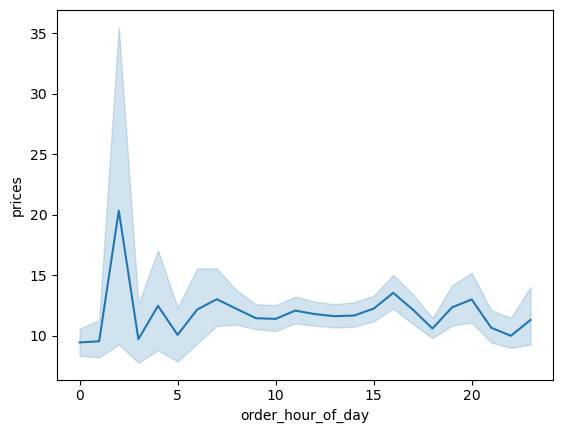

In [40]:
# create line chart
line1 = sns.lineplot(data = df_q5, x = 'order_hour_of_day',y = 'prices')

# it seems that during night time, customers buy higher priced products

In [41]:
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_how_prices.png'))


In [14]:
# question 6
# create a new df with the columns needed to answer the question
df_q6 = small[['Age','fam_status']]

In [19]:
# check output
df_q6.head()

,Age,fam_status
0,31,married
2,31,married
3,31,married
6,31,married
10,31,married


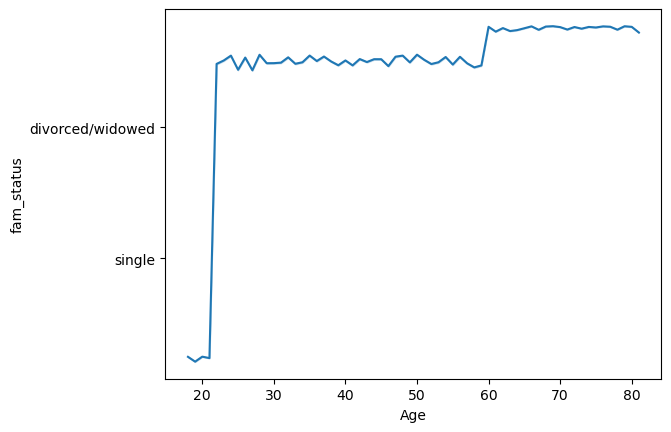

In [42]:
# create line chart
line2 = sns.lineplot(data = df_q6, x = 'Age',y = 'fam_status')


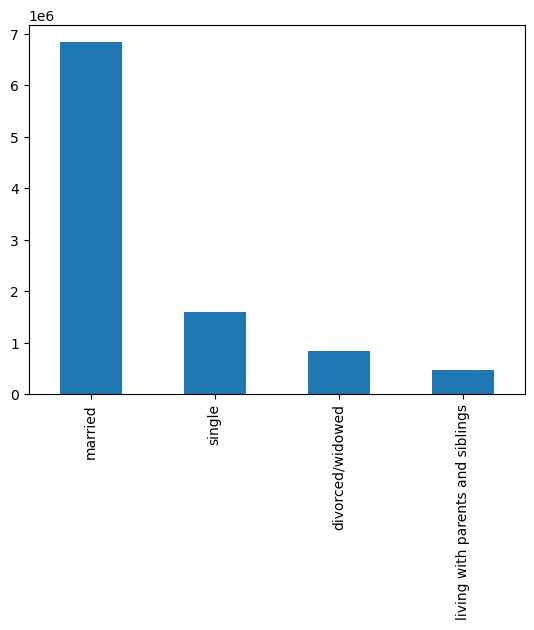

In [17]:
bar16=df_q6['fam_status'].value_counts().plot.bar()

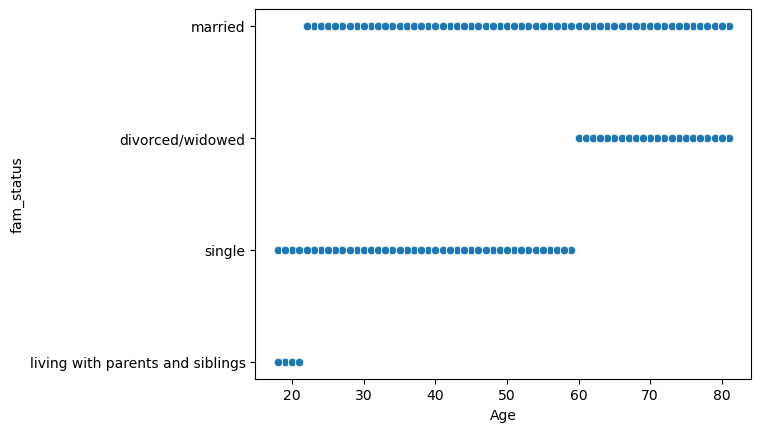

In [20]:
scatter=sns.scatterplot(x = 'Age', y = 'fam_status',data = df_q6)


In [45]:
# export png
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'q6_age_fam_status.png'))


Based on this chart we can only see that significantly younger people (20yo and younger) are singal. As the intuition would suggest, older people tend to be more divorced or widowed. 

In [32]:
# create new df to asnwer question 7
df_q7=small[['Age','income']]

In [33]:
# check output
df_q7.head()

,Age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


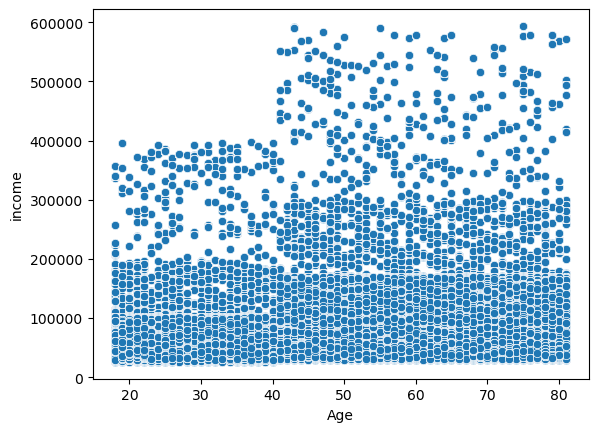

In [44]:
# create scatterplot
scatter=sns.scatterplot(x = 'Age', y = 'income',data = df_q7)


It is clear that people under the age of 40 have significant less purchasing power compared to people older than that. 

In [46]:
# export png
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'q6_age_income.png'))
